# **Overview**

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.

This dataset includes important attributes of the garment manufacturing process and the productivity of the employees which had been collected manually and also been validated by the industry experts

**Expected Output :** 
create a regression model that can predict the productivity performance of the working teams and has the best performance 

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Import Dataset**

In [ ]:
# importing files from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define additional string / value to recognize as NA/NAN
missing_values = ['Unknown / Non-Applicable', 'n/a', 'nan', '-', '--', 'null', ' ', '-1', -1]

# Read a comma-separated values (csv) file into DataFrame
data = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/garments_worker_productivity.csv',na_values = missing_values)

# **Data Description**

In [ ]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


**Dataset Source : https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees**

**Features / Columns Description :**
1. **`date`** : `Date in MM-DD-YYYY`
2. **`quarter`** : `A portion of the month (A month was devided into five quarters)`
3. **`department`** : `Associated department with the instance`
4. **`day`** : `Day of the week`
5. **`team`** : `Associated team number with the instance`
6. **`targeted_productivity`** : `Targeted productivity set by the authority for each team for each day`
7. **`smv`** : `Standard Minute Value, it is the allocated time for a task`
8. **`wip`** : `Work in progress. includes the number of unfinished items for products` 
9. **`over_time`** : `Represents the amount of overtime by each team in minutes`
10. **`incentives`** : `Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action`
11. **`idle_time`** : `The amount of time when the production was interrupted due to several reasons`
12. **`idle_men`** : `The number of workers who were idle due to production interruption`
13. **`no_of_style_change`** : `Number of changes in the style of a particular product` 
14. **`no_of_worker`** : `Number of workers in each team`
15. **`actual_productivity`** : `The actual % of productivity that was delivered by the workers. It ranges from 0-1`


In [ ]:
# prints information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

**Analysis :**
- The dataset above consist of 15 columns/features and 1197 rows
- Categorical data consists of `quarter`, `department`, `day` features
- Numerical data consists of `team`, `targeted_productivity`, `smv`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change`, `no_of_workers`, `actual_productivity` features
- `no_of_workers` feature type is float and we find some abnormal value on it (example : 30.5)
- There are missing values in `wip` feature

In [ ]:
# group columns/features based on type
cat = ['date', 'quarter', 'department', 'day']
num = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity']

In [ ]:
# statistical summary of numerical features 
data[num].describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


**Analysis :**
- Minimum and maximum values for all column seem reasonable because there are no negative values, but we can find an outlier in maximum values of actual productivity (> 1)

In [ ]:
# get to know value counts of categorical features
for col in cat:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of date column
3/11/2015    24
1/31/2015    24
1/11/2015    23
3/10/2015    23
1/12/2015    23
1/24/2015    23
1/8/2015     22
1/10/2015    22
1/7/2015     22
1/13/2015    22
1/5/2015     22
3/9/2015     22
3/8/2015     22
3/3/2015     22
1/22/2015    22
2/25/2015    21
2/26/2015    21
2/28/2015    21
1/3/2015     21
1/4/2015     21
1/28/2015    21
1/27/2015    21
3/4/2015     21
1/25/2015    21
1/17/2015    21
1/14/2015    21
1/6/2015     21
2/18/2015    21
1/29/2015    20
2/17/2015    20
3/2/2015     20
3/1/2015     20
2/22/2015    20
2/19/2015    20
3/5/2015     19
3/7/2015     19
2/24/2015    19
2/23/2015    19
1/1/2015     19
2/3/2015     19
2/15/2015    19
1/15/2015    19
1/18/2015    19
1/19/2015    19
1/21/2015    19
1/26/2015    19
2/1/2015     19
2/2/2015     19
2/4/2015     19
2/7/2015     19
2/8/2015     19
2/10/2015    19
2/11/2015    19
2/12/2015    19
2/5/2015     18
2/9/2015     18
2/16/2015    18
2/14/2015    17
1/20/2015    15
Name: date, dtype: int64 

V

**Analysis :**

- There is a wrong type in value counts of department column `(sweing)`. We can change it into `sewing`
- Department of `finishing` separated into 2 value counts. We can combine the data
- Extract the month of the `date` feature. All of data were taken in 2015 (not in different year), so we can ignore it and we have already `quarter` and `day` features to replace the day of the `date` feature

# **Feature Engineering**

## **1. Extract Month From Date Feature**

In [ ]:
# extract month of date feature and drop the date feature
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data.drop(['date'], axis = 'columns', inplace = True)
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,3
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,3


## **2. Correcting The Wrong Type**

In [ ]:
# correcting the wrong type and combine 2 separated values in department feature
data['department'] = data['department'].apply(lambda x: 'finishing' if x == ('finishing ' or 'finishing' ) else 'sewing' )
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,sewing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,3
1193,Quarter2,sewing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3
1194,Quarter2,sewing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,3
1195,Quarter2,sewing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,3


## **3. Round Up The Value Of No Of Workers & Change The DataType Into Integer**

In [ ]:
# round up the value of no_of_workers
data['no_of_workers'] = data['no_of_workers'].apply(np.ceil)

In [ ]:
# change the datatype of no_of_workers from float into integer
data['no_of_workers'] = data['no_of_workers'].astype(float).astype(int)

In [ ]:
data

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8,0.886500,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,31,0.800570,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,sewing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8,0.628333,3
1193,Quarter2,sewing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8,0.625625,3
1194,Quarter2,sewing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8,0.625625,3
1195,Quarter2,sewing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15,0.505889,3


## **4. Change The Value Of Actual Productivity > 1 Become Actual Productivity = 1**

In [ ]:
# comparing the data that have actual productivity = 0,99 and actual productivity > 1
data[data['actual_productivity'] > 0.99].sort_values(['no_of_workers'], ascending = True)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
40,Quarter1,finishing,Sunday,3,0.75,4.15,NaN,1560,0,0.0,0,0,8,0.991389,1
337,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8,1.033570,1
767,Quarter3,sewing,Sunday,2,0.80,3.94,NaN,960,0,0.0,0,0,8,1.108125,2
766,Quarter3,sewing,Sunday,1,0.80,3.94,NaN,960,0,0.0,0,0,8,1.120437,2
562,Quarter1,finishing,Monday,9,0.75,3.94,NaN,960,0,0.0,0,0,8,0.994271,2
542,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8,1.011562,2
712,Quarter2,sewing,Wednesday,12,0.80,4.08,NaN,1080,0,0.0,0,0,9,1.020000,2
692,Quarter2,sewing,Tuesday,12,0.80,4.08,NaN,1080,0,0.0,0,0,9,1.004889,2
823,Quarter3,sewing,Wednesday,12,0.80,5.13,NaN,1200,0,0.0,0,0,10,0.991800,2
583,Quarter1,finishing,Tuesday,1,0.80,3.94,NaN,1200,0,0.0,0,0,10,0.994850,2


**Analysis :**

From the comparison above, the data that have actual productivity > 1 are approximately similar with the data that have actual productivity = 0,99. So, we can change the value of the data that have actual productivity > 1 become actual productivity = 1 

In [ ]:
# change the value of the data that have actual productivity > 1 become actual productivity = 1 
data.loc[data["actual_productivity"] > 1, "actual_productivity"] = 1

# **Data Cleaning**

## **1. Handling Missing Values**

In [ ]:
# check the missing values
data_missing_value = data.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(data))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,wip,506,42.27


**Analysis :**
- The number of missing values in `wip` column is 42,27%. So we just drop the `wip` column
  - if we drop missing values by rows, the dataset will become smaller because we must delete 506 rows from 1197 rows and we deal with missing many informations from the other important columns/features
  - we decide not to impute missing values by mean / median to avoid abnormal & unnatural distribution of data, considering that the number of missing values ​​is quite a lot

In [ ]:
# handling missing values with KNN Imputer Method
data = data.drop(['wip'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   over_time              1197 non-null   int64  
 7   incentive              1197 non-null   int64  
 8   idle_time              1197 non-null   float64
 9   idle_men               1197 non-null   int64  
 10  no_of_style_change     1197 non-null   int64  
 11  no_of_workers          1197 non-null   int64  
 12  actual_productivity    1197 non-null   float64
 13  month                  1197 non-null   int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 131.0+ 

In [ ]:
data

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sewing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8,0.886500,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,31,0.800570,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,31,0.800570,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,sewing,Wednesday,10,0.75,2.90,960,0,0.0,0,0,8,0.628333,3
1193,Quarter2,sewing,Wednesday,8,0.70,3.90,960,0,0.0,0,0,8,0.625625,3
1194,Quarter2,sewing,Wednesday,7,0.65,3.90,960,0,0.0,0,0,8,0.625625,3
1195,Quarter2,sewing,Wednesday,9,0.75,2.90,1800,0,0.0,0,0,15,0.505889,3


**There are no missing values anymore**

## **2. Duplicated Data**

In [ ]:
# check the duplicated data
data.duplicated().sum()

0

**There is no duplicated values**

# **Exploratory Data Analysis**

## **1. Statistical Summary**

In [ ]:
# group column names based on type
num = ['team', 'targeted_productivity', 'smv', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'actual_productivity', 'month']
cat = ['quarter', 'department', 'day']

In [ ]:
# numerical statistical summary
data[num].describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.668338,0.734461,1.724311
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.243885,0.173380,0.744558
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705,1.000000
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307,1.000000
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333,2.000000
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253,2.000000
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000,3.000000


**Analysis :**
- Minimum and maximum values for all features seem reasonable because there are no negative values
- `targeted_productivity`, `smv`, `actual_productivity`, `month` features have negatively skewed distribution (mean < median)
- `team`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change` , `no_of_workers` features have positively skewed distribution (mean > median)

In [ ]:
# categorical statistical summary
data[cat].describe()

,quarter,department,day
count,1197,1197,1197
unique,5,2,6
top,Quarter1,sewing,Wednesday
freq,360,940,208


In [ ]:
#inspect the exact frequency of each value of a categorical column
for col in cat:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of quarter column
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64 

Value counts of department column
sewing       940
finishing    257
Name: department, dtype: int64 

Value counts of day column
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64 



**Analysis :**
- The data is predominantly taken in the 1st quarter and in sewing department. There is significant difference between the number of the data in the other quarters and department.
- There is no significant difference between the amount of data taken on those days

## **2. Univariate Analysis**

### **2.1 Detect Outliers**

<Figure size 10800x7200 with 0 Axes>

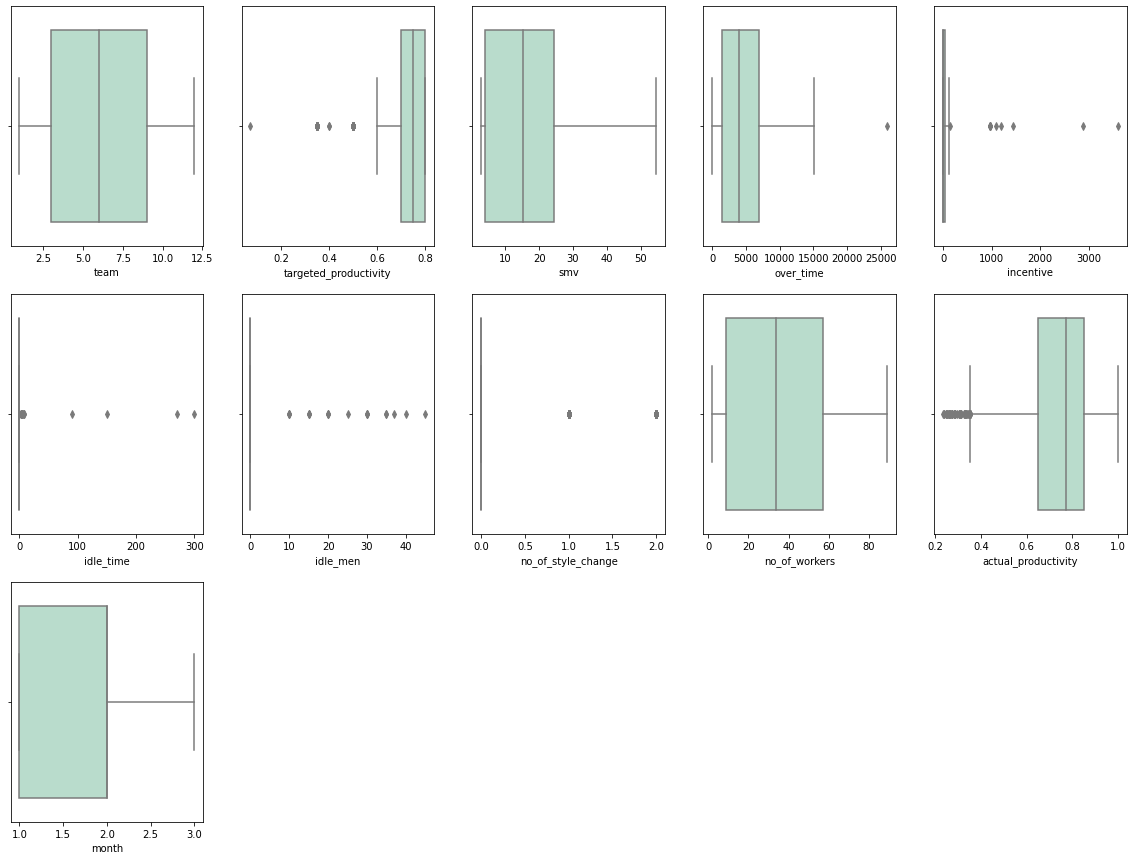

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(150,100))

# plotting all features except boolean data type`s features
fig, ax = plt.subplots(3,5, figsize=(20, 15))
sns.boxplot(data['team'], ax=ax[0][0], palette = "Pastel2")
sns.boxplot(data['targeted_productivity'], ax=ax[0][1], palette = "Pastel2")
sns.boxplot(data['smv'], ax=ax[0][2], palette = "Pastel2")
sns.boxplot(data['over_time'], ax=ax[0][3], palette = "Pastel2")
sns.boxplot(data['incentive'], ax=ax[0][4], palette = "Pastel2")
sns.boxplot(data['idle_time'], ax=ax[1][0], palette = "Pastel2")
sns.boxplot(data['idle_men'], ax=ax[1][1], palette = "Pastel2")
sns.boxplot(data['no_of_style_change'], ax=ax[1][2], palette = "Pastel2")
sns.boxplot(data['no_of_workers'], ax=ax[1][3], palette = "Pastel2")
sns.boxplot(data['actual_productivity'], ax=ax[1][4], palette = "Pastel2")
sns.boxplot(data['month'], ax=ax[2][0], palette = "Pastel2")
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[2][4])

**Analysis :**
- There are no outlier in `team`, `smv`, `no_of_workers`,`month` features
- There are ouliers in `targeted_productivity`, `wip`, `over_time`, `incentive`, `idle_time`, `idle_men`, `no_of_style_change`, `actual_productivity` features

### **2.2 Distribution Form**

<Figure size 14400x6480 with 0 Axes>

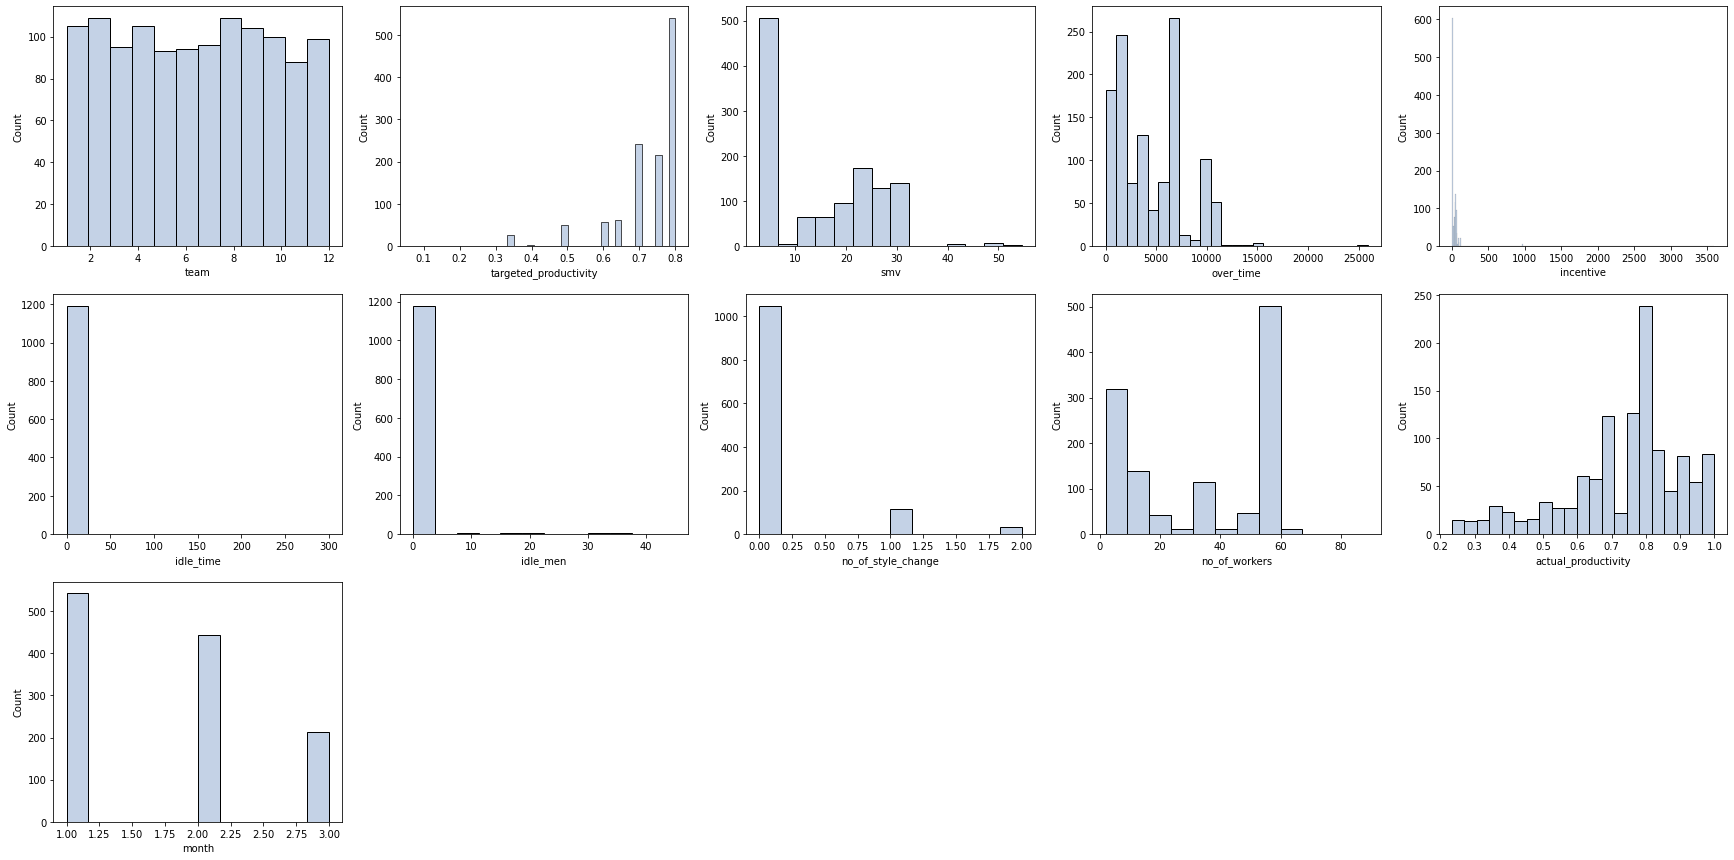

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(200,90))

# plotting all features except boolean data type`s features
fig, ax = plt.subplots(3,5, figsize=(30, 15))
sns.histplot(data=data, x='team', ax=ax[0][0], color = "lightsteelblue")
sns.histplot(data=data, x='targeted_productivity', ax=ax[0][1], color = "lightsteelblue")
sns.histplot(data=data, x='smv', ax=ax[0][2], color = "lightsteelblue")
sns.histplot(data=data, x='over_time', ax=ax[0][3], color = "lightsteelblue")
sns.histplot(data=data, x='incentive', ax=ax[0][4], color = "lightsteelblue")
sns.histplot(data=data, x='idle_time', ax=ax[1][0], color = "lightsteelblue")
sns.histplot(data=data, x='idle_men', ax=ax[1][1], color = "lightsteelblue")
sns.histplot(data=data, x='no_of_style_change', ax=ax[1][2], color = "lightsteelblue")
sns.histplot(data=data, x='no_of_workers', ax=ax[1][3], color = "lightsteelblue")
sns.histplot(data=data, x='actual_productivity', ax=ax[1][4], color = "lightsteelblue")
sns.histplot(data=data, x='month', ax=ax[2][0], color = "lightsteelblue")
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[2][4])

<Figure size 10800x7200 with 0 Axes>

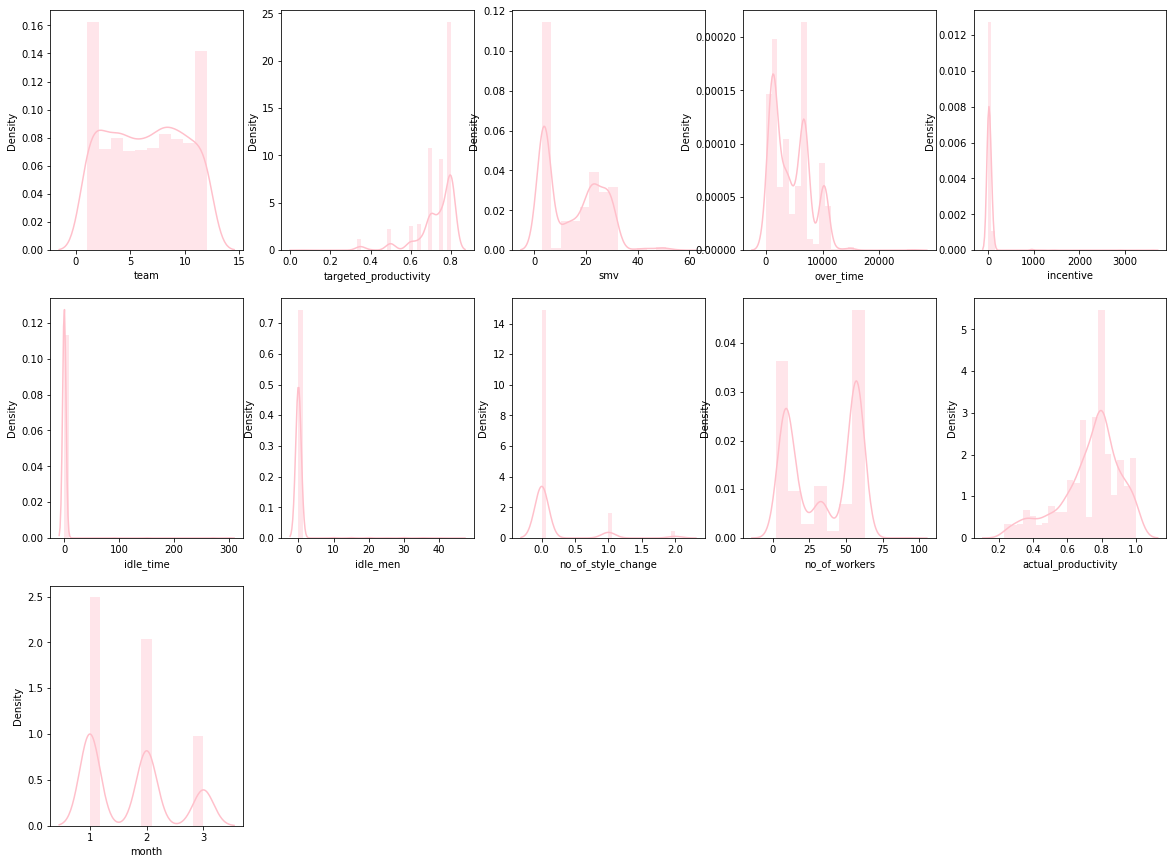

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(150,100))

# plotting all features except boolean data type`s features
fig, ax = plt.subplots(3,5, figsize=(20, 15))
sns.distplot(data['team'], ax=ax[0][0], color = "pink")
sns.distplot(data['targeted_productivity'], ax=ax[0][1], color = "pink")
sns.distplot(data['smv'], ax=ax[0][2], color = "pink")
sns.distplot(data['over_time'], ax=ax[0][3], color = "pink")
sns.distplot(data['incentive'], ax=ax[0][4], color = "pink")
sns.distplot(data['idle_time'], ax=ax[1][0], color = "pink")
sns.distplot(data['idle_men'], ax=ax[1][1], color = "pink")
sns.distplot(data['no_of_style_change'], ax=ax[1][2], color = "pink")
sns.distplot(data['no_of_workers'], ax=ax[1][3], color = "pink")
sns.distplot(data['actual_productivity'], ax=ax[1][4], color = "pink")
sns.distplot(data['month'], ax=ax[2][0], color = "pink")
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
fig.delaxes(ax[2][3])
fig.delaxes(ax[2][4])

**Analysis :**
- `team` has roughly symmetrical distribution
- `targeted_productivity`, `actual_productivity` features has negatively skewed distribution 
- `smv`,`wip`, `over_time`, `incentive`, `idle_time`, `idle_men` features have positively skewed distribution
- `no_of_style_change`, `no_of_workers`, `month` have multimodal distribution. Multimodal distribution indicates that those features devided into several group 

### **2.3 Countplot for Categorical Column**

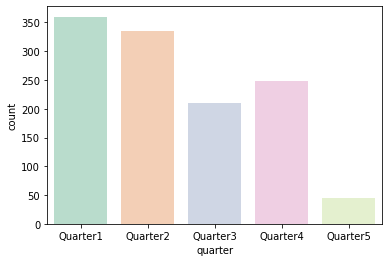

In [ ]:
# a visual version of value_counts of quarter feature
sns.countplot(data['quarter'], palette = "Pastel2")

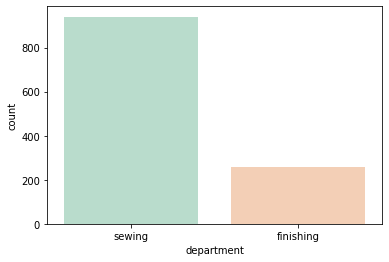

In [ ]:
# a visual version of value_counts of department feature
sns.countplot(data['department'], palette = "Pastel2")

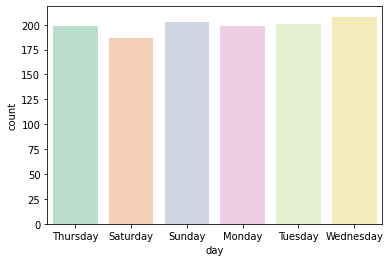

In [ ]:
# a visual version of value_counts of day feature
sns.countplot(data['day'], palette = "Pastel2")

**Analysis :**
- The proportion data taken in each quarter has different proportion. Most data is taken in quarter 1. Quarter 5 has the smallest amount of data
- The proportion data taken in sewing department is larger than the proportion data taken in finishing department
- The proportion data taken each day (friday not included) have almost the same amount and the difference is not significant

## **3. Multivariate Analysis**

In [ ]:
# create a column to show the difference between actual_productivity and targeted_productivity
data['margin_productivity'] = data['actual_productivity'] - data['targeted_productivity'] 

- margin_productivity = + , it means their productivity exceeds the targeted productivity
- margin_productivity = - , it means their productivity do not meet the target 

### **3.1 Productivity Among The Teams**

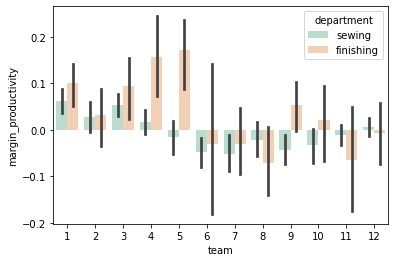

In [ ]:
# create the barplot to know the mean of margin_productivity among the teams in each department
sns.barplot(x = 'team', y = 'margin_productivity', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. Average productivity margin in sewing department is lower than  average productivity margin in finishing department
2. In sewing department :
  - Team 1,2,3,4 and 12 have positive average productivity margin, meaning their productivity exceeds the targeted productivity. Team 1 is the most productive
  - Team 5,6,7,8,9,10, and 11 have negative average productivity margin, meaning their productivity do not reach the target. Team 7 is the least productive.
3. In finishing department :
  - Team 1,2,3,4,5,9 and 10 have positive average productivity margin, meaning their productivity exceeds the targeted productivity. Team 5 is the most productive
  - Team 6,7,8,11, and 12 have negative average productivity margin, meaning their productivity do not reach the target. Team 8 is the least productive.

### **3.2 SMV Among The Teams**

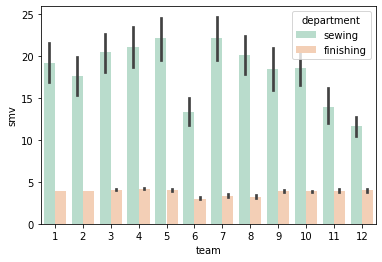

In [ ]:
sns.barplot(x = 'team', y = 'smv', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. smv average in sewing department is higher than smv average in finishing department and it has a significant difference. It indicates that sewing process takes more time than finishing process
2. Sewing process needs around 10 - 24 minutes. Team 5 has The highest smv average and team 12 has the lowest smv average in sewing department  
3. Finishing process needs around <= 5 minutes

### **3.3 Over Time Among The Teams**

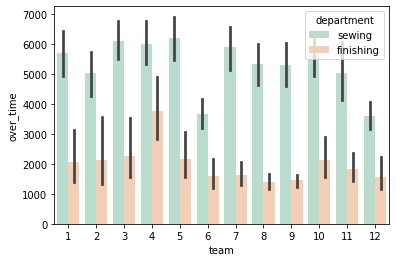

In [ ]:
sns.barplot(x = 'team', y = 'over_time', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. Overtime average in sewing department is higher than overtime average in finishing department.
2. The higher of smv average, the higher of over time average is

### **3.4 No Of Workers Among The Teams**

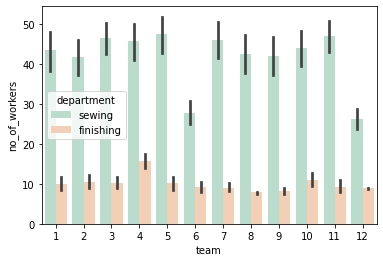

In [ ]:
sns.barplot(x = 'team', y = 'no_of_workers', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. The average amount of workers in sewing department is higher than the average amount of workers in finishing department.
2. The higher of smv average and overtime average, the higher of the average amount of workers are

### **3.5 Incentive Among The Teams**

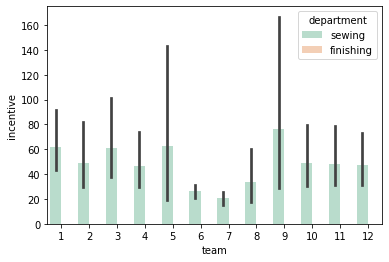

In [ ]:
sns.barplot(x = 'team', y = 'incentive', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. incentives are given specifically to workers in the sewing department only
2. Team 9 has the highest incentive average, but the productivity of that team has negative average productivity margin. this indicates that giving high incentives does not really affect employee productivity. It also happened in team 5, 10, and 11.
3. But for team 1,2,3,4 and 12, providing incentives is quite good in achieving target productivity
4. Team 6 and 12 have almost the same of smv average, over time average, and the average amount of workers value, but the incentive average in team 12 is higher than the incentive average in team 6. Therefore the productivity of team 12 has a positive average productivity margin, while the productivity of team 6 has a negative average productivity margin
5. Team 7 has smv average and over time average value that higher than smv average and over time average value in team 9, but it has the smallest incentive average value. Therefore team 7 become the least productive team in sewing department. It also happened in team 8.

### **3.6 Idle Time Among The Teams**

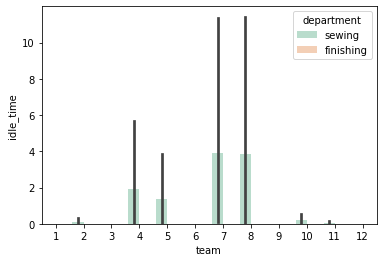

In [ ]:
sns.barplot(x = 'team', y = 'idle_time', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. Idle time are happened to workers in the sewing department only.
2. team 2, 10, and 11 have a small idle time average value
3. team 4, 5, 7, and 8 have a large idle time average value. The idle time average value of team 4 is larger than team 5 but team 4 can reach the productivity target, meanwhile the team 5 has negative average productivity margin, same with team 7 and 8.

### **3.7 Idle Men Among The Teams**

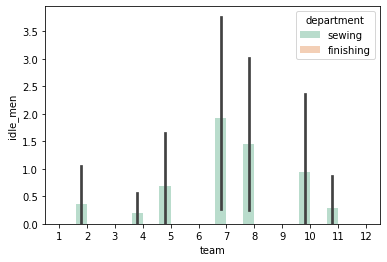

In [ ]:
sns.barplot(x = 'team', y = 'idle_men', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. Idle men are also happened to workers in the sewing department only.
2. The higher of idle time average, the higher of idle men average are, except for team 4. The idle time average of team 4 is higher than team 5 but the idle men average is lower than team 5

### **3.8 No Of Change Style Among The Teams**

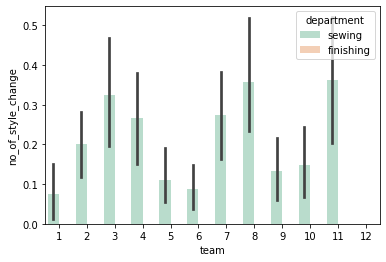

In [ ]:
sns.barplot(x = 'team', y = 'no_of_style_change', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. The change style process is happened to workers in the sewing department only
2. The highest average amount of change style happened in team 8 and 11. It can affect the productivity of worker because changes in style make workers have to re-learn how to sew different types of garment products than what they usually do. It takes more time to finish it, so the productivity will be decrease than usual. That is why team 8 and 11 have negative average margin value.

### **3.9 Target Productivity Achievement In Each Quarter**

In [ ]:
data['achieve_target'] = np.where(data['margin_productivity'] >= 0, 1, 0)

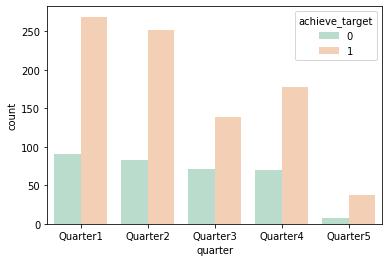

In [ ]:
sns.countplot(data=data, x ='quarter',  hue ='achieve_target', palette = "Pastel2")

**Analysis :**
1. The proportion of targeted productivity achievement is larger than the proportion of failure to achieve productivity target in each quarter
2. The proportion of failure to reach productivity target is a half from The proportion of targeted productivity achievement in quarter 3

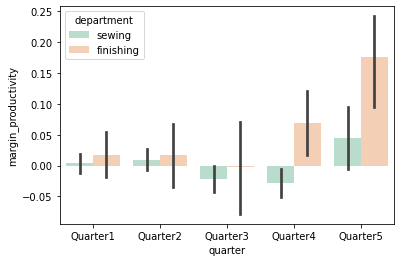

In [ ]:
sns.barplot(x = 'quarter', y = 'margin_productivity', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. In sewing department, positive average productivity margin happened in quarter 1, 2, and 5. In quarter 3 and 4, they have negative average productivity margin.
2. In finishing department, in each quarter has positive average productivity margin. And the highest one happened in quarter 5

### **3.10 Target Productivity Achievement In Each Day**

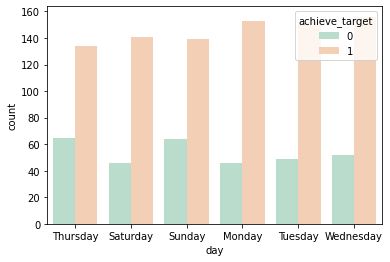

In [ ]:
sns.countplot(data=data, x ='day',  hue ='achieve_target', palette = "Pastel2")

**Analysis :**
1. The proportion of targeted productivity achievement is larger than the proportion of failure to achieve productivity target in each day

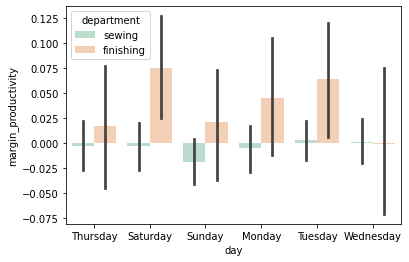

In [ ]:
sns.barplot(x = 'day', y = 'margin_productivity', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. In sewing department, positive average productivity margin happened on tuesday & wednesday. On thursday, saturday, sunday, & monday, they have negative average productivity margin.
2. In finishing department, on thursday, saturday, sunday, monday, tuesday have positive average productivity margin. The highest one happened on saturday. Just on wednesday it has negative average productivity margin. 

### **3.11 Target Productivity Achievement In Each Month**

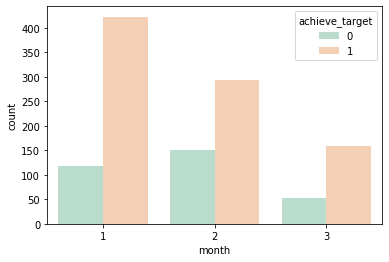

In [ ]:
sns.countplot(data=data, x ='month',  hue ='achieve_target', palette = "Pastel2")

1. The proportion of targeted productivity achievement is larger than the proportion of failure to achieve productivity target in each month

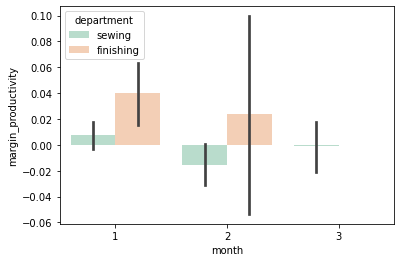

In [ ]:
sns.barplot(x = 'month', y = 'margin_productivity', hue = 'department', data = data, palette = "Pastel2" )

**Analysis :**
1. In January, both of sewing & finishing department have positive average productivity margin
2. In February, sewing department has negative average productivity. Meanwhile finishing department has positive average productivity.
3. In March, sewing department has positive average productivity. meanwhile there is no record data of finishing department

## **4. Deep Dive Question**

### **4.1 What is the effective & efficient standard to achieve high target productivity in sewing department ?**

In [ ]:
smv_sw = data.loc[(data['actual_productivity'] > 0.90) & (data['margin_productivity'] > 0) & (data['department'] == 'sewing')]
smv_sw = smv_sw.drop(['quarter', 'department', 'day', 'month'], axis=1)
smv_sw.drop_duplicates().reset_index(drop=True)
smv_sw['smv'].value_counts().sort_index()

2.90      6
3.90      2
3.94     14
4.08      3
4.15      7
4.60     17
5.13      6
18.79     1
22.52    55
22.94     3
25.90     1
26.16     3
26.82     1
Name: smv, dtype: int64

**SMV = 2,9 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 2.90)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
623,6,0.70,2.9,960,0,0.0,0,0,8,0.942500,0.242500,1
824,6,0.80,2.9,1440,0,0.0,0,0,12,0.936861,0.136861,1
903,10,0.70,2.9,1800,0,0.0,0,0,15,0.902222,0.202222,1
1070,11,0.80,2.9,1200,0,0.0,0,0,10,0.927292,0.127292,1
1108,9,0.75,2.9,1080,0,0.0,0,0,9,0.929074,0.179074,1
1128,11,0.80,2.9,0,960,0.0,0,0,8,0.960625,0.160625,1


For product that has smv = 2,9 minutes, the effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive 
3. no_of_workers = 8

**SMV = 3.90 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 3.90)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
1005,2,0.7,3.9,1200,0,0.0,0,0,10,0.928850,0.228850,1
1069,2,0.6,3.9,960,0,0.0,0,0,8,0.950625,0.350625,1


For product that has smv = 3,9 minutes, the effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive 
3. no_of_workers = 8

**SMV = 3.94 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 3.94)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
602,2,0.8,3.94,2160,0,0.0,0,0,18,0.966759,0.166759,1
603,1,0.8,3.94,1200,0,0.0,0,0,10,0.929183,0.129183,1
621,2,0.8,3.94,2640,0,0.0,0,0,22,0.999924,0.199924,1
636,2,0.8,3.94,3000,0,0.0,0,0,25,1.000000,0.200000,1
674,2,0.8,3.94,2160,0,0.0,0,0,18,1.000000,0.200000,1
675,1,0.8,3.94,1200,0,0.0,0,0,10,0.962017,0.162017,1
693,2,0.8,3.94,2160,0,0.0,0,0,18,0.966759,0.166759,1
716,2,0.8,3.94,2160,0,0.0,0,0,18,0.912037,0.112037,1
766,1,0.8,3.94,960,0,0.0,0,0,8,1.000000,0.200000,1
767,2,0.8,3.94,960,0,0.0,0,0,8,1.000000,0.200000,1


For product that has smv = 3,94 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive 
3. no_of_workers = 8

**SMV = 4.08 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 4.08)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
624,12,0.8,4.08,1080,0,0.0,0,0,9,0.906667,0.106667,1
692,12,0.8,4.08,1080,0,0.0,0,0,9,1.000000,0.200000,1
712,12,0.8,4.08,1080,0,0.0,0,0,9,1.000000,0.200000,1


For product that has smv = 4,08 minutes, the effective & efficient productivity has the following standard :
1. over_time = 1080 minutes
2. there is no incentive 
3. no_of_workers = 9

**SMV = 4,15 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 4.15)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
604,8,0.70,4.15,3000,0,0.0,0,0,25,0.915767,0.215767,1
656,7,0.70,4.15,1440,0,0.0,0,0,12,0.928681,0.228681,1
711,4,0.70,4.15,1800,0,0.0,0,0,15,1.000000,0.300000,1
715,8,0.35,4.15,1440,0,0.0,0,0,12,0.994375,0.644375,1
731,4,0.70,4.15,1800,0,0.0,0,0,15,1.000000,0.300000,1
750,7,0.70,4.15,1800,0,0.0,0,0,15,0.929278,0.229278,1
751,4,0.75,4.15,2400,0,0.0,0,0,20,0.902917,0.152917,1


For product that has smv = 4,15 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 1440 minutes
2. there is no incentive 
3. no_of_workers = 12

**SMV = 4,6 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 4.6)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
923,5,0.8,4.6,1080,0,0.0,0,0,9,0.902963,0.102963,1
924,3,0.8,4.6,2400,0,0.0,0,0,20,0.900833,0.100833,1
943,3,0.8,4.6,6300,0,0.0,0,0,15,0.921704,0.121704,1
944,5,0.8,4.6,7560,0,0.0,0,0,18,0.921605,0.121605,1
964,3,0.8,4.6,6300,0,0.0,0,0,15,0.921704,0.121704,1
965,5,0.8,4.6,7560,0,0.0,0,0,18,0.921605,0.121605,1
985,3,0.8,4.6,10500,0,0.0,0,0,25,0.936356,0.136356,1
1025,7,0.8,4.6,4200,0,0.0,0,0,10,0.999533,0.199533,1
1026,3,0.8,4.6,6300,0,0.0,0,0,15,0.902963,0.102963,1
1047,3,0.8,4.6,1200,0,0.0,0,0,10,0.939167,0.139167,1


For product that has smv = 4,6 minutes, the effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive 
3. no_of_workers = 8

**SMV = 5,13 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 5.13)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
805,7,0.7,5.13,1200,0,0.0,0,0,10,0.913750,0.213750,1
806,12,0.8,5.13,1080,0,0.0,0,0,9,0.902500,0.102500,1
823,12,0.8,5.13,1200,0,0.0,0,0,10,0.991800,0.191800,1
825,2,0.8,5.13,1440,0,0.0,0,0,12,0.919125,0.119125,1
885,8,0.7,5.13,960,0,0.0,0,0,8,0.930417,0.230417,1
886,12,0.8,5.13,1080,0,0.0,0,0,9,0.902500,0.102500,1


For product that has smv = 5,13 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive 
3. no_of_workers = 8

**SMV = 18,79 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 18.79)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
922,9,0.75,18.79,6240,56,0.0,0,1,52,0.970817,0.220817,1


For product that has smv = 18,79 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 6240 minutes
2. incentive = 56
3. no_of_workers = 52

**SMV = 22,52 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 22.52)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
354,4,0.75,22.52,10080,94,0.0,0,0,56,0.900556,0.150556,1
397,4,0.75,22.52,10260,94,0.0,0,0,57,0.900321,0.150321,1
422,4,0.75,22.52,10260,94,0.0,0,0,57,0.900321,0.150321,1
456,2,0.75,22.52,6840,119,0.0,0,0,57,1.000000,0.250000,1
457,3,0.75,22.52,6840,119,0.0,0,0,57,1.000000,0.250000,1
461,10,0.80,22.52,6720,70,0.0,0,0,56,0.900130,0.100130,1
477,2,0.80,22.52,6840,90,0.0,0,0,57,1.000000,0.200000,1
478,3,0.80,22.52,6840,113,0.0,0,0,57,1.000000,0.200000,1
498,2,0.80,22.52,6840,113,0.0,0,0,57,1.000000,0.200000,1
500,3,0.80,22.52,6840,100,0.0,0,0,57,0.950186,0.150186,1


For product that has smv = 22,52 minutes, the effective & efficient productivity has the following standard :
1. over_time = 0 minutes
2. incentive = 90
3. no_of_workers = 58

**SMV = 22,94 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 22.94)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
396,2,0.75,22.94,10260,94,0.0,0,0,57,0.900648,0.150648,1
544,1,0.80,22.94,3060,113,0.0,0,0,59,1.000000,0.200000,1
561,1,0.80,22.94,7020,113,0.0,0,0,59,1.000000,0.200000,1


For product that has smv = 22,94 minutes, the effective & efficient productivity has the following standard :
1. over_time = 3060 minutes
2. incentive = 113
3. no_of_workers = 59

**SMV = 25,90 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 25.90)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
240,7,0.8,25.9,10170,70,0.0,0,0,57,0.900145,0.100145,1


For product that has smv = 25,94 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 10170 minutes
2. incentive = 70
3. no_of_workers = 57

**SMV = 26,16 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 26.16)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
0,8,0.8,26.16,7080,98,0.0,0,0,59,0.940725,0.140725,1
128,9,0.8,26.16,10620,88,0.0,0,0,59,0.900216,0.100216,1
172,9,0.8,26.16,10620,88,0.0,0,0,59,0.900216,0.100216,1


For product that has smv = 26,16 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 7080 minutes
2. incentive = 98
3. no_of_workers = 59

**SMV = 26,82 minutes**

In [ ]:
smv_sw.loc[(data['smv'] == 26.82)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
1152,1,0.75,26.82,7080,75,0.0,0,0,59,0.900061,0.150061,1


For product that has smv = 26,82 minutes, the  effective & efficient productivity has the following standard :
1. over_time = 7080 minutes
2. incentive = 75
3. no_of_workers = 59

### **4.2 What is the effective & efficient standard to achieve high target productivity in finishing department ?**

In [ ]:
smv_fin = data.loc[(data['actual_productivity'] > 0.90) & (data['margin_productivity'] > 0) & (data['department'] == 'finishing')]
smv_fin = smv_fin.drop(['quarter', 'department', 'day', 'month'], axis=1)
smv_fin.drop_duplicates().reset_index(drop=True)
smv_fin['smv'].value_counts().sort_index()

2.90     3
3.94    53
4.08     1
4.15    17
4.30    10
Name: smv, dtype: int64

**SMV = 2,90 minutes**

In [ ]:
smv_fin.loc[(data['smv'] == 2.90)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
20,11,0.75,2.9,5640,0,0.0,0,0,17,0.987880,0.237880,1
395,8,0.80,2.9,1620,0,0.0,0,0,9,0.910522,0.110522,1
479,6,0.35,2.9,1800,0,0.0,0,0,15,0.977556,0.627556,1


For product that has smv = 2,9 minutes, the  effective & efficient margin productivity has the following standard :
1. over_time = 1620 minutes
2. there is no incentive
3. no_of_workers = 9

**SMV = 3,94 minutes**

In [ ]:
smv_fin.loc[(data['smv'] == 3.94)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
22,3,0.75,3.94,1560,0,0.0,0,0,8,0.945278,0.195278,1
23,1,0.80,3.94,960,0,0.0,0,0,8,0.902917,0.102917,1
41,9,0.80,3.94,960,0,0.0,0,0,8,0.931646,0.131646,1
42,1,0.80,3.94,960,0,0.0,0,0,8,0.915229,0.115229,1
61,1,0.80,3.94,1920,0,0.0,0,0,8,0.961059,0.161059,1
62,11,0.80,3.94,2400,0,0.0,0,0,10,0.939514,0.139514,1
83,4,0.80,3.94,4440,0,0.0,0,0,18,0.966781,0.166781,1
84,1,0.80,3.94,1440,0,0.0,0,0,8,0.936496,0.136496,1
104,1,0.80,3.94,1440,0,0.0,0,0,8,0.951420,0.151420,1
126,1,0.80,3.94,1440,0,0.0,0,0,8,0.947689,0.147689,1


For product that has smv = 3,94 minutes, the  effective & efficient margin productivity has the following standard :
1. over_time = 240 minutes
2. there is no incentive
3. no_of_workers = 2

**SMV = 4,08 minutes**

In [ ]:
smv_fin.loc[(data['smv'] == 4.08)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
526,12,0.75,4.08,1080,0,0.0,0,0,9,0.971867,0.221867,1


For product that has smv = 4,08 minutes, the effective & efficient productivity has the following standard :
1. over_time = 1080 minutes
2. there is no incentive
3. no_of_workers = 9

**SMV = 4,15 minutes**

In [ ]:
smv_fin.loc[(data['smv'] == 4.15)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
19,4,0.80,4.15,6600,0,0.0,0,0,20,0.988025,0.188025,1
21,9,0.80,4.15,960,0,0.0,0,0,8,0.956271,0.156271,1
40,3,0.75,4.15,1560,0,0.0,0,0,8,0.991389,0.241389,1
149,3,0.75,4.15,2760,0,0.0,0,0,12,0.930340,0.180340,1
170,3,0.75,4.15,1440,0,0.0,0,0,8,0.935322,0.185322,1
195,3,0.80,4.15,1800,0,0.0,0,0,10,0.905455,0.105455,1
219,3,0.80,4.15,1620,0,0.0,0,0,9,0.901263,0.101263,1
238,11,0.80,4.15,1980,0,0.0,0,0,7,0.934607,0.134607,1
278,5,0.65,4.15,2700,0,0.0,0,0,15,0.987197,0.337197,1
320,5,0.65,4.15,1440,0,0.0,0,0,8,0.958902,0.308902,1


For product that has smv = 4,15 minutes, the effective & efficient productivity has the following standard :
1. over_time = 960 minutes
2. there is no incentive
3. no_of_workers = 8

**SMV = 4,30 minutes**

In [ ]:
smv_fin.loc[(data['smv'] == 4.30)]

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,margin_productivity,achieve_target
194,4,0.35,4.3,3240,0,0.0,0,0,18,0.942214,0.592214,1
216,4,0.35,4.3,2160,0,0.0,0,0,12,0.952020,0.602020,1
239,4,0.35,4.3,2700,0,0.0,0,0,8,0.908081,0.558081,1
259,4,0.35,4.3,3600,0,0.0,0,0,20,0.988636,0.638636,1
318,4,0.70,4.3,5040,0,0.0,0,0,28,0.977273,0.277273,1
352,4,0.75,4.3,6000,0,0.0,0,0,20,0.978526,0.228526,1
421,4,0.75,4.3,2160,0,0.0,0,0,12,0.952020,0.202020,1
439,4,0.75,4.3,2160,0,0.0,0,0,12,0.963699,0.213699,1
459,4,0.80,4.3,1440,0,0.0,0,0,12,0.940625,0.140625,1
499,4,0.80,4.3,1200,0,0.0,0,0,10,0.989000,0.189000,1


For product that has smv = 4,3 minutes, the effective & efficient productivity has the following standard :
1. over_time = 1200 minutes
2. there is no incentive
3. no_of_workers = 10

# **Preprocessing Model**

## **1. Encoding Categorical Data** 

In [ ]:
# one hot encoding for quarter, department, day features
from sklearn.preprocessing import OneHotEncoder

# quarter features
dummies_quarter = pd.get_dummies(data['quarter'],prefix='quarter')
data = pd.concat([data, dummies_quarter], axis=1)
data = data.drop('quarter', axis=1)
data = data.drop('quarter_Quarter1', axis=1)

# department features
dummies_dept = pd.get_dummies(data['department'],prefix='department')
data = pd.concat([data, dummies_dept], axis=1)
data = data.drop('department', axis=1)
data = data.drop('department_finishing', axis=1)

# day features
dummies_day = pd.get_dummies(data['day'],prefix='day')
data = pd.concat([data, dummies_day], axis=1)
data = data.drop('day', axis=1)
data = data.drop('day_Sunday', axis=1)

In [ ]:
data

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_sewing,day_Monday,day_Saturday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8,0.886500,...,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,31,0.800570,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,31,0.800570,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,960,0,0.0,0,0,8,0.628333,...,1,0,0,0,1,0,0,0,0,1
1193,8,0.70,3.90,960,0,0.0,0,0,8,0.625625,...,1,0,0,0,1,0,0,0,0,1
1194,7,0.65,3.90,960,0,0.0,0,0,8,0.625625,...,1,0,0,0,1,0,0,0,0,1
1195,9,0.75,2.90,1800,0,0.0,0,0,15,0.505889,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
# rename column that has been encoded 
data = data.rename(columns={'quarter_Quarter1' : 'quarter1', 'quarter_Quarter2' : 'quarter2',
                            'quarter_Quarter3' : 'quarter3', 'quarter_Quarter4' : 'quarter4',
                            'quarter_Quarter5' : 'quarter5', 'day_Monday' : 'monday',
                            'day_Tuesday' : 'tuesday', 'day_Wednesday' : 'wednesday',
                            'day_Thursday' : 'thursday', 'day_Friday' : 'friday',
                            'day_Saturday' : 'saturday', 'day_Sunday' : 'sunday'})
data

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter2,quarter3,quarter4,quarter5,department_sewing,monday,saturday,thursday,tuesday,wednesday
0,8,0.80,26.16,7080,98,0.0,0,0,59,0.940725,...,0,0,0,0,1,0,0,1,0,0
1,1,0.75,3.94,960,0,0.0,0,0,8,0.886500,...,0,0,0,0,0,0,0,1,0,0
2,11,0.80,11.41,3660,50,0.0,0,0,31,0.800570,...,0,0,0,0,1,0,0,1,0,0
3,12,0.80,11.41,3660,50,0.0,0,0,31,0.800570,...,0,0,0,0,1,0,0,1,0,0
4,6,0.80,25.90,1920,50,0.0,0,0,56,0.800382,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,960,0,0.0,0,0,8,0.628333,...,1,0,0,0,1,0,0,0,0,1
1193,8,0.70,3.90,960,0,0.0,0,0,8,0.625625,...,1,0,0,0,1,0,0,0,0,1
1194,7,0.65,3.90,960,0,0.0,0,0,8,0.625625,...,1,0,0,0,1,0,0,0,0,1
1195,9,0.75,2.90,1800,0,0.0,0,0,15,0.505889,...,1,0,0,0,1,0,0,0,0,1


## **2. Split Data** 

In [ ]:
# split train test
from sklearn.model_selection import train_test_split

feature = data.drop(columns='actual_productivity')
target = data[['actual_productivity']]

feature_data_train, feature_data_test, target_data_train, target_data_test = train_test_split(feature, target, test_size=0.20, random_state=42)

## **3. Multicollinearity**

In [ ]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,team,1.104652
2,targeted_productivity,1.193078
3,smv,7.092457
4,over_time,2.802229
5,incentive,1.085267
6,idle_time,1.127424
7,idle_men,1.204698
8,no_of_style_change,1.663948
9,no_of_workers,9.695713
10,month,2.265900


**Analysis :**

1. From the VIF scores of the features above, There are 2 features with moderate multicollinearity :
  - `no_of_workers`
  - `smv` 


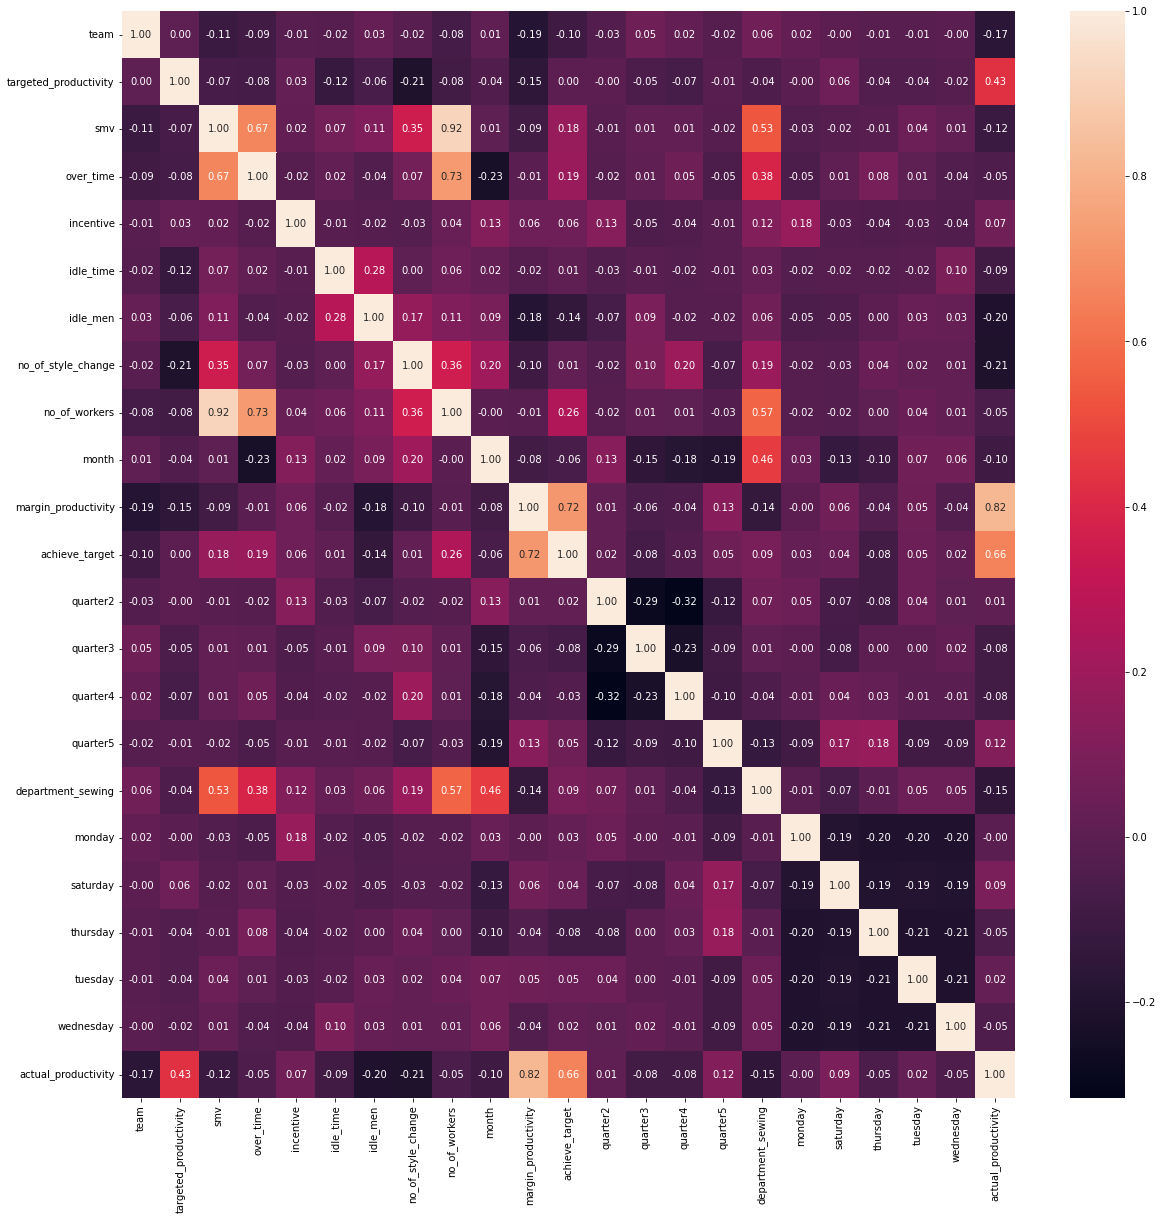

In [ ]:
# heatmap correlation
actprod_train = pd.concat([feature_data_train, target_data_train], axis=1)
corr = actprod_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Analysis :**

1.  `smv` feature have a strong positive correlation (0,92) with `no_of_workers` feature
2. drop `no_of_workers` feature & retain the `smv`feature, because `smv` has the higher correlation value with `actual_productivity` (|-0,12| > |-0,05|)

## **4. Drop Redundant Features**

In [ ]:
# drop redundant features
feature_data_train = feature_data_train.drop(columns=['no_of_workers'])
feature_data_test = feature_data_test.drop(columns=['no_of_workers'])

In [ ]:
# recheck VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_data_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,team,1.099058
2,targeted_productivity,1.192529
3,smv,2.817514
4,over_time,2.366102
5,incentive,1.083606
6,idle_time,1.126257
7,idle_men,1.188530
8,no_of_style_change,1.553598
9,month,2.233564
10,margin_productivity,2.771138


# **Modelling & Evaluate The Model**

## **1. Multiple Linear Regression**

### **1.1 Define The Model**

In [ ]:
# define the multiple linear regression model
from sklearn.linear_model import LinearRegression
multi_reg = LinearRegression()

### **1.2 Training The Model**

In [ ]:
from sklearn.linear_model import LinearRegression

# define the model
multi_reg = LinearRegression()

# train the model
X_data_train = feature_data_train.to_numpy()
y_data_train = target_data_train.to_numpy()
y_data_train = y_data_train.reshape(len(y_data_train,))

multi_reg.fit(X_data_train, y_data_train)

LinearRegression()

In [ ]:
# retrieve the coefficients
data = feature_data_train
model = multi_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_] + list(model.coef_)
})

coef_df

,feature,coefficient
0,intercept,9.229284e-13
1,team,-1.725740e-14
2,targeted_productivity,1.000000e+00
3,smv,-3.454705e-14
4,over_time,-6.419003e-17
5,incentive,7.327724e-17
6,idle_time,2.912174e-17
7,idle_men,-3.235978e-17
8,no_of_style_change,2.550691e-16
9,month,6.717050e-16


**Analysis :**
- `targeted_productivity` feature has a major influence on the increasing amount of `actual productivity`.
- Every one point's increase on the `targeted_productivity` feature and assume that the other features are on fixed value. Then it will be associated with a variable target increases (`actual productivity`) as much as 1

### **1.3 Model Diagnostic**

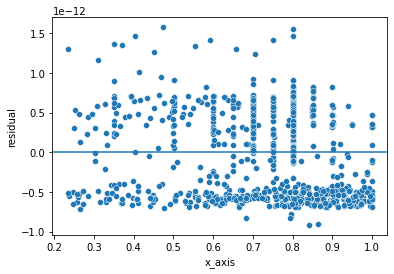

In [ ]:
# calculate residuals
y_predict_train = multi_reg.predict(X_data_train)
residual = y_data_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

**Analysis :**

Checked assumptions of multiple linear regression via residual plot :
1.   Assumption 1 - Linearity **(fulfilled)**
     
     The straight line in the middle divides the distribution data fairly

2.   Assumption 2 - Constant Variance of Residual **(fulfilled)**

     Residuals have constant variance

3.   Assumption 3 - Independent & Uncorellated Residuals **(fulfilled)**
     
     Residual data pattern is random. there is no correlation between consecutive residuals in time series data.




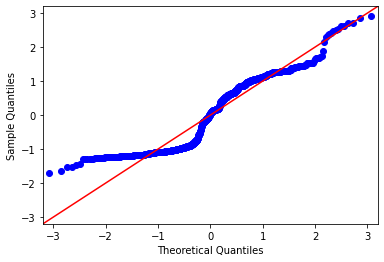

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Analysis :**

Checked assumptions of multiple linear regression via QQ plot :
1.   Assumption 4 - Residuals are normally distributed **(not fulfilled)**
     
     residual data does not coincide well with the gradient line of the QQ plot and does not forms the straight line

### **1.4 Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(y_data_train, y_predict_train)))

R-squared for training data is 1.0


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_data_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_data_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_data_train, y_predict_train)))

RMSE for training data is 5.420231446406531e-13
MAE for training data is 4.882223442430845e-13
MAPE for training data is 7.397908826140658e-13


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = multi_reg.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_data_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_data_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_data_test, y_predict_test)))

RMSE for testing data is 5.451765771083698e-13
MAE for testing data is 4.950528413131631e-13
MAPE for testing data is 7.197967195922721e-13


**Analysis :**
- 100% of variability of `actual_productivity` is perfectly explained
using all the features in the model
- The standard deviation of
prediction errors is 5.451e-13. From the regression
line, the residuals mostly
deviate between +- 5.451e-13
- On average, our prediction using multiple linear regression model deviates the true `actual_productivity` by 4.950e-13
- Moreover, this by 4.950e-13 is equivalent to 7,197e-11 % deviation relative to the true `actual_productivity`

## **2. Ridge Regression**

### **2.1 Define The Model**

In [ ]:
# define ridge regression model
from sklearn.linear_model import Ridge
ridge_reg = Ridge(random_state=42)

### **2.2 Training The Model With Hyperparameter Tuning**

In [ ]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_data_train, y_data_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-3.787795e-08,1
1,{'alpha': 1e-05},-3.787787e-07,2
2,{'alpha': 0.0001},-3.787707e-06,3
3,{'alpha': 0.001},-3.786905e-05,4
4,{'alpha': 0.01},-3.778903e-04,5
5,{'alpha': 0.1},-3.700529e-03,6
6,{'alpha': 1},-3.053597e-02,7
7,{'alpha': 5},-8.275015e-02,8
8,{'alpha': 10},-1.013708e-01,9
9,{'alpha': 20},-1.103631e-01,10


### **2.3 Choose The Best Lambda**

In [ ]:
# choose the best lambda
ridge_reg_gridcv.best_estimator_

Ridge(alpha=1e-06, random_state=42)

In [ ]:
# the coefficients of the best estimator (exclude intercept)
ridge_reg_gridcv.best_estimator_.coef_

array([-8.21116260e-10,  9.99999843e-01, -1.76221637e-10, -6.88652220e-13,
        5.82111669e-12, -3.42577868e-10, -4.23508946e-10, -9.80594312e-09,
        3.83275605e-10,  9.99999853e-01,  3.93223823e-08, -1.18275586e-09,
       -6.28071524e-10, -2.23359750e-09,  3.94524284e-09, -5.97168604e-09,
       -3.39207532e-09,  2.00100957e-09, -5.80550697e-10, -7.76472846e-10,
       -3.43020287e-09])

In [ ]:
# the intercept of the best estimator
ridge_reg_gridcv.best_estimator_.intercept_

1.043477806383919e-07

In [ ]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[ridge_reg_gridcv.best_estimator_.intercept_] + list(ridge_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.043478e-07
1,team,-8.211163e-10
2,targeted_productivity,9.999998e-01
3,smv,-1.762216e-10
4,over_time,-6.886522e-13
5,incentive,5.821117e-12
6,idle_time,-3.425779e-10
7,idle_men,-4.235089e-10
8,no_of_style_change,-9.805943e-09
9,month,3.832756e-10


### **2.4 Model Diagnostic**

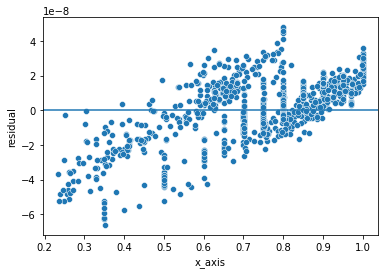

In [ ]:
# calculate residuals
y_predict_train = ridge_reg_gridcv.best_estimator_.predict(X_data_train)
residual = y_data_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

**Analysis :**

Checked assumptions of ridge regression via residual plot :
1.   Assumption 1 - Linearity **(fulfilled)**
     
     There is a straight-line relationship between the
predictors and the target

2.   Assumption 2 - Constant Variance of Residual **(not fulfilled)**

     Residuals have random & unconstant variance

3.   Assumption 3 - Independent & Uncorellated Residuals **(fulfilled)**
     
     Residual data pattern is random. there is no correlation between consecutive residuals in time series data.

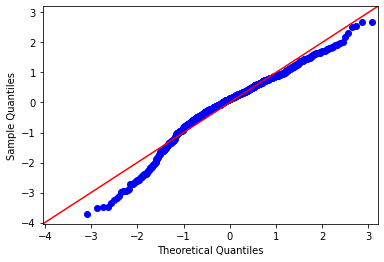

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Analysis :**

Checked assumptions of ridge regression via QQ plot :
1.   Assumption 4 - Residuals are normally distributed **(fulfilled)**
     
     residual data coincides well with the gradient line of the QQ plot and forms the straight line

### **2.5 Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(y_data_train, y_predict_train)))

R-squared for training data is 0.9999999999999898


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_data_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_data_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_data_train, y_predict_train)))

RMSE for training data is 1.7807466914193017e-08
MAE for training data is 1.3393731943979474e-08
MAPE for training data is 2.3399401048941453e-08


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = ridge_reg_gridcv.best_estimator_.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_data_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_data_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_data_test, y_predict_test)))

RMSE for testing data is 2.0053711734138225e-08
MAE for testing data is 1.406390407095633e-08
MAPE for testing data is 2.2657698484865717e-08


**Analysis :**
- 99,99% of variability of `actual_productivity` is successfully explained
using all the features in the model
- The standard deviation of
prediction errors is 2,0053e-08. From the regression
line, the residuals mostly
deviate between +- 2,0053e-08
- On average, our prediction using ridge regression model deviates the true `actual_productivity` by 1,4063e-08
- Moreover, this by  1,4063e-08 is equivalent to 2,2657e-06 % deviation relative to the true `actual_productivity`

## **3. Lasso Regression**

### **3.1 Define The Model**

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(random_state=42)

### **3.2 Training The Model With Hyperparameter Tuning**

In [ ]:
# tune lambda (denote as 'alpha' in sklearn)
# using GridSearchCV
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_data_train, y_data_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-0.002897,3
1,{'alpha': 1e-05},-0.000147,1
2,{'alpha': 0.0001},-0.001469,2
3,{'alpha': 0.001},-0.014693,4
4,{'alpha': 0.01},-0.122331,5
5,{'alpha': 0.1},-0.174869,6
6,{'alpha': 1},-0.175921,7
7,{'alpha': 5},-0.176148,10
8,{'alpha': 10},-0.176102,9
9,{'alpha': 20},-0.176040,8


### **3.3 Choose The Best Lambda**

In [ ]:
# choose the best lambda
lasso_reg_gridcv.best_estimator_

Lasso(alpha=1e-05, random_state=42)

In [ ]:
# the coefficients of the best estimator (exclude intercept)
lasso_reg_gridcv.best_estimator_.coef_

array([-6.21486569e-06,  9.98689417e-01, -2.65432189e-06, -3.50581451e-09,
        3.73917997e-08, -2.31197488e-06, -4.19501100e-06, -2.20056922e-05,
       -0.00000000e+00,  9.98971213e-01,  2.24686185e-04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

In [ ]:
# the intercept of the best estimator
lasso_reg_gridcv.best_estimator_.intercept_

0.0008928462358303024

In [ ]:
# show as a nice dataframe
coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[lasso_reg_gridcv.best_estimator_.intercept_] + list(lasso_reg_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,8.928462e-04
1,team,-6.214866e-06
2,targeted_productivity,9.986894e-01
3,smv,-2.654322e-06
4,over_time,-3.505815e-09
5,incentive,3.739180e-08
6,idle_time,-2.311975e-06
7,idle_men,-4.195011e-06
8,no_of_style_change,-2.200569e-05
9,month,-0.000000e+00


### **3.4 Model Diagnostic**

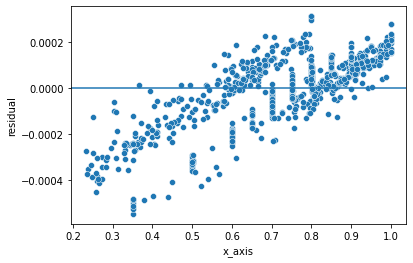

In [ ]:
# calculate residuals
y_predict_train = lasso_reg_gridcv.best_estimator_.predict(X_data_train)
residual = y_data_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

**Analysis :**

Checked assumptions of lasso regression via residual plot :
1.   Assumption 1 - Linearity **(fulfilled)**
     
     The straight line in the middle divides the distribution data fairly

2.   Assumption 2 - Constant Variance of Residual **(not fulfilled)**

     Residuals have random & unconstant variance

3.   Assumption 3 - Independent & Uncorellated Residuals **(fulfilled)**
     
     Residual data pattern is random. there is no correlation between consecutive residuals in time series data.

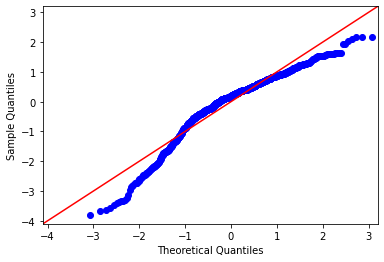

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Analysis :**

Checked assumptions of lasso regression via QQ plot :
1.   Assumption 4 - Residuals are normally distributed **(fulfilled)**
     
    Almost 75% residual data coincide well with the gradient line of the QQ plot and forms the straight line

### **3.5 Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(y_data_train, y_predict_train)))

R-squared for training data is 0.999999327829636


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_data_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_data_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_data_train, y_predict_train)))

RMSE for training data is 0.00014412589311614513
MAE for training data is 0.00010831406575920484
MAPE for training data is 0.00019123338072385765


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = lasso_reg_gridcv.best_estimator_.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_data_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_data_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_data_test, y_predict_test)))

RMSE for testing data is 0.0001517506074926495
MAE for testing data is 0.00011080246702528501
MAPE for testing data is 0.00017875331787462788


**Analysis :**
- Only 99,99% of variability of `actual_productivity` is successfully explained
using all the features in the model
- The standard deviation of
prediction errors is 0,0001517. From the regression
line, the residuals mostly
deviate between +- 0,0001517
- On average, our prediction using lasso regression model deviates the true `actual_productivity` by 0,00011080
- Moreover, this by 0,00011080 is equivalent to 0,017 % deviation relative to the true `actual_productivity`

## **4. Random Forest Regression**

### **4.1 Define The Model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

### **4.2 Training The Model**

In [ ]:
random_forest.fit(X_data_train, y_data_train)

RandomForestRegressor()

In [ ]:
# Check the feature importance
random_forest.feature_importances_

array([1.81955367e-03, 2.21206843e-01, 3.04274217e-03, 2.55353966e-03,
       3.05809178e-04, 3.66368684e-05, 3.64267418e-05, 1.35173944e-03,
       7.78194585e-04, 7.65461858e-01, 3.93889952e-06, 3.71279119e-04,
       1.13138944e-04, 2.94766820e-04, 3.48068526e-05, 1.71098532e-03,
       1.79204954e-04, 9.26339988e-05, 2.26795199e-04, 2.09436489e-04,
       1.69669668e-04])

### **4.3 Model Diagnostic**

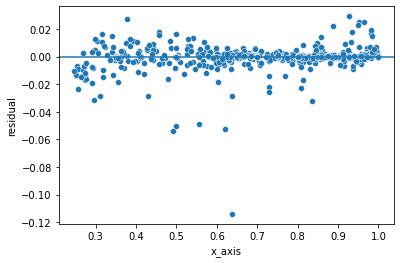

In [ ]:
# calculate residuals
y_predict_train = random_forest.predict(X_data_train)
residual = y_data_train - y_predict_train

# prepare dataframe
# >1 predictor --> predicted value VS residual
df_resid = pd.DataFrame({
    'x_axis': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="x_axis", y="residual")
plt.axhline(0)
plt.show()

**Analysis :**

Checked assumptions of random forest regression via residual plot :
1.   Assumption 1 - Linearity **(fulfilled)**
     
     The straight line in the middle divides the distribution data fairly

2.   Assumption 2 - Constant Variance of Residual **(not fulfilled)**

     Residuals have random & unconstant variance

3.   Assumption 3 - Independent & Uncorellated Residuals **(fulfilled)**
     
     Residual data pattern is random. there is no correlation between consecutive residuals in time series data.

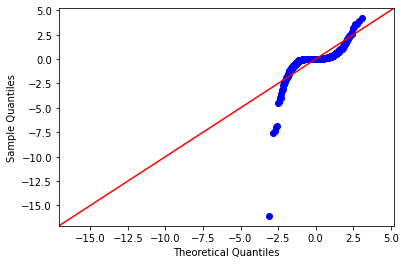

In [ ]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

**Analysis :**

Checked assumptions of random forest regression via QQ plot :
1.   Assumption 4 - Residuals are normally distributed **(not fulfilled)**
     
     residual data does not coincide well with the gradient line of the QQ plot and does not forms the straight line

### **4.4 Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(y_data_train, y_predict_train)))

R-squared for training data is 0.9983740082799668


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_data_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_data_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_data_train, y_predict_train)))

RMSE for training data is 0.007088616742219882
MAE for training data is 0.0025125729278349463
MAPE for training data is 0.005031183549306322


In [ ]:
# prepare prediction result on test data
X_data_test = feature_data_test.to_numpy()
y_predict_test = random_forest.predict(X_data_test)

# ground truth target
y_data_test = target_data_test.to_numpy()
y_data_test = y_data_test.reshape(len(y_data_test),)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_data_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_data_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_data_test, y_predict_test)))

RMSE for testing data is 0.01735186389899434
MAE for testing data is 0.005582533890541708
MAPE for testing data is 0.009752722301241664


**Analysis :**
- 99.83% of variability of `actual_productivity` is successfully explained
using all the features in the model
- The standard deviation of
prediction errors is 0,01736. From the regression
line, the residuals mostly
deviate between +- 0,01736
- On average, our prediction using random forest regression model deviates the true `actual_productivity` by 0,00532
- Moreover, this by 0,00532 is equivalent to 0,93% deviation relative to the true `actual_productivity`

## **5. Deep Learning Approach**

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(12, input_dim=21, activation='relu')) # input layer + 1st hidden layer
model.add(Dense(8, activation='relu')) # 2nd hidden layer 
model.add(Dense(1, activation='sigmoid')) # output layer

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                264       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mse','mae','mape'])

In [ ]:
model.fit(feature_data_train, target_data_train, validation_data=(feature_data_test, target_data_test), epochs=300, batch_size=8)

Epoch 1/300
120/120 [==============================] - 1s 4ms/step - loss: 0.1021 - mse: 0.1021 - mae: 0.2670 - mape: 48.9949 - val_loss: 0.0910 - val_mse: 0.0910 - val_mae: 0.2537 - val_mape: 43.7127
Epoch 2/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0968 - mse: 0.0968 - mae: 0.2553 - mape: 45.6550 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.2226 - val_mape: 38.2772
Epoch 3/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0858 - mse: 0.0858 - mae: 0.2361 - mape: 41.6205 - val_loss: 0.0698 - val_mse: 0.0698 - val_mae: 0.2167 - val_mape: 36.5762
Epoch 4/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0861 - mse: 0.0861 - mae: 0.2348 - mape: 40.2875 - val_loss: 0.0463 - val_mse: 0.0463 - val_mae: 0.1645 - val_mape: 23.6976
Epoch 5/300
120/120 [==============================] - 0s 2ms/step - loss: 0.0889 - mse: 0.0889 - mae: 0.2379 - mape: 40.9778 - val_loss: 0.0665 - val_mse: 0.0665 - val_mae: 0.2140 - val_mape: 35.

In [ ]:
model.evaluate(feature_data_test, target_data_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0733 - mape: 11.4380


[0.008494708687067032,
 0.008494708687067032,
 0.0733405277132988,
 11.43801212310791]

**Analysis :**
- The standard deviation of
prediction errors is 0,0085. From the regression
line, the residuals mostly
deviate between +- 0,0389
- On average, our prediction using deep learning model deviates the true `actual_productivity` by 0,1556
- Moreover, this by 0,0389 is equivalent to 24,65% deviation relative to the true `actual_productivity`